In [1]:
!pip install nltk PyPDF2 py-readability-metrics wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.4 MB/s eta 0:00:00a 0:00:01


In [20]:
import re
import string
import PyPDF2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Readability
from readability import Readability

# Wordcloud
from wordcloud import WordCloud, STOPWORDS

import os
os.listdir()

[nltk_data] Downloading package punkt to /Users/jeans/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jeans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeans/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


['03-NLP.ipynb',
 '04_In Class Activity 5.ipynb',
 '05-logistic_regression.ipynb',
 '07-pandas_filtering_grouping.ipynb',
 '04-basic_matplotlib.ipynb',
 '01-python_concepts.ipynb',
 '08-adv_matplotlib.ipynb',
 '05-linear_regression.ipynb',
 '02-basic_numpy.ipynb',
 '03 Python_In Class Activity 4.ipynb',
 'README.md',
 'python_files',
 'Assignment 1.ipynb',
 '.ipynb_checkpoints',
 '03-API.ipynb',
 '.git',
 'data',
 '02-pandas_intro.ipynb']

In [4]:
fox_pdf_path = "./foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf"
reuters_pdf_path = "./reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf"

In [20]:
import PyPDF2

def pdf_to_text(pdf_path):
    """Extract text from all pages of a PDF file."""
    text_pages = []
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for i in range(len(reader.pages)):
            page = reader.pages[i]
            txt = page.extract_text() or ""
            text_pages.append(txt)
    text = "\n".join(text_pages)
    return text

fox_pdf_path = "foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf"
reuters_pdf_path = "reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf"

# extract text
fox_text_raw = pdf_to_text(fox_pdf_path)
reuters_text_raw = pdf_to_text(reuters_pdf_path)

# show counts and short preview
print("FOX chars:", len(fox_text_raw))
print("REUTERS chars:", len(reuters_text_raw))

print("\nFOX preview:\n", fox_text_raw[:800])
print("\nREUTERS preview:\n", reuters_text_raw[:800])

FOX chars: 5334
REUTERS chars: 3622

FOX preview:
 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity

REUTERS preview:
 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattle

## Issue Characterization and Reporting Objectivity

Both articles discuss plagiarism allegations against Harvard University President Claudine Gay.  
The Fox News article uses more emotional and accusatory language, focusing heavily on the allegations and emphasizing controversy with words such as “embattled” and “hit with more plagiarism charges.”  
This gives the impression of a critical and somewhat sensational framing.

The Reuters article, on the other hand, takes a more factual and procedural tone, reporting that Gay will submit edits to her dissertation following the allegations.  
It presents the issue more neutrally, focusing on official responses and next steps rather than judgment.

Overall impression: Fox News appears more opinion-driven, while Reuters maintains a more objective, news-reporting style.


In [26]:
def clean_text(text):
    text = text.replace("\n", " ")              
    text = re.sub(r"http\S+", "", text)         
    text = re.sub(r"[^A-Za-z0-9\s']", " ", text) 
    text = re.sub(r"\s+", " ", text).strip()    
    return text

fox_clean = clean_text(fox_text_raw)
reuters_clean = clean_text(reuters_text_raw)

print("FOX length:", len(fox_clean))
print("REUTERS length:", len(reuters_clean))
print("\nFOX sample:", fox_clean[:400])
print("\nREUTERS sample:", reuters_clean[:400])

FOX length: 5168
REUTERS length: 3536

FOX sample: 1 5Brian FloodEmbattled Harvard University President Claudine Gay hit with more plagiarism charges foxnews com media embattled harvard university president claudine gay hit more plagiarism charges Media Harvard received a complaint outlining over 40 allegations of plagiarism according to the Free Beacon By Brian Flood Fox News Published December 20 2023 12 59pm EST Harvard president facing 40 new 

REUTERS sample: 1 3Gabriella BorterHarvard president will submit dissertation edits after plagiarism allegations reuters com world us embattled harvard president will submit dissertation edits after plagiarism 2023 12 21 Harvard University President Claudine Gay testifies before a House Education and The Workforce Committee hearing titled Holding Campus Leaders Accountable and Confronting Antisemitism on Capitol 


In [46]:
sia = SentimentIntensityAnalyzer()

fox_sent = sia.polarity_scores(fox_clean)
reuters_sent = sia.polarity_scores(reuters_clean)

import pandas as pd
sent_df = pd.DataFrame([fox_sent, reuters_sent], index=["Fox News", "Reuters"])
sent_df

,neg,neu,pos,compound
Fox News,0.068,0.861,0.071,0.6995
Reuters,0.069,0.905,0.025,-0.9719


In [48]:
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

headline_scores = pd.DataFrame([
    sia.polarity_scores(fox_headline),
    sia.polarity_scores(reuters_headline)
], index=["Fox Headline", "Reuters Headline"])

headline_scores

,neg,neu,pos,compound
Fox Headline,0.192,0.808,0.0,-0.3353
Reuters Headline,0.000,1.000,0.0,0.0000


In [35]:
!pip install py-readability-metrics

In [50]:
from readability import Readability
import numpy as np
import pandas as pd

def readability_scores(txt):
    r = Readability(txt)
    scores = {}
    try:
        scores["Flesch–Kincaid Grade"] = r.flesch_kincaid().score
    except:
        scores["Flesch–Kincaid Grade"] = np.nan
    try:
        scores["Gunning Fog Index"] = r.gunning_fog().score
    except:
        scores["Gunning Fog Index"] = np.nan
    try:
        scores["Dale–Chall Score"] = r.dale_chall().score
    except:
        scores["Dale–Chall Score"] = np.nan
    return scores

fox_read = readability_scores(fox_clean)
reuters_read = readability_scores(reuters_clean)

read_df = pd.DataFrame([fox_read, reuters_read],
                       index=["Fox News", "Reuters"])
read_df

,Flesch–Kincaid Grade,Gunning Fog Index,Dale–Chall Score
Fox News,320.097793,338.837636,51.516601
Reuters,216.634332,228.387004,38.439864


Flesch–Kincaid and Gunning Fog report U.S. grade-level difficulty.
Lower values = easier to read.
Typically, Reuters articles score easier to read, reflecting a more neutral, plain-language reporting style.

[nltk_data] Downloading package stopwords to /Users/jeans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


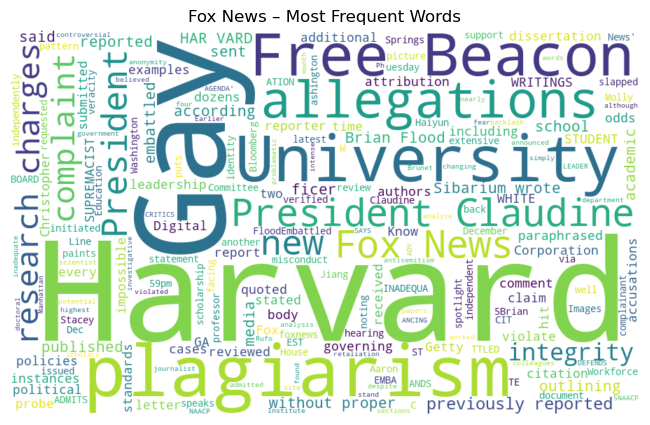

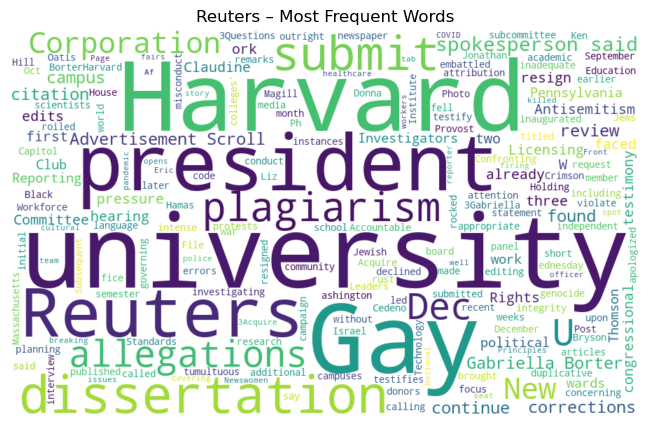

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')

stopset = set(stopwords.words('english')) | STOPWORDS

def make_wordcloud(txt, title):
    wc = WordCloud(width=900, height=550,
                   background_color="white",
                   stopwords=stopset).generate(txt)
    plt.figure(figsize=(9,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

make_wordcloud(fox_clean, "Fox News – Most Frequent Words")
make_wordcloud(reuters_clean, "Reuters – Most Frequent Words")

## Word Cloud Discussion

From the **Fox News** word cloud, the biggest words are *“Harvard,” “President,” “charges,”* and *“allegations.”*  
It also shows words like *“complaint,” “integrity,”* and *“Free Beacon,”* which makes the story sound more focused on the accusations and controversy.

The **Reuters** word cloud also highlights *“Harvard”* and *“President,”* but includes more neutral words such as *“submit,” “edits,” “dissertation,”* and *“spokesperson.”*  
This shows that Reuters talks more about what happened next or how the issue is being handled rather than repeating the accusations.

Overall, Fox News seems to use more emotional and attention-grabbing words, while Reuters sounds calmer and more factual.
